In [8]:
import pandas as pd

In [9]:
ds1 = pd.read_csv('exercise.csv')
ds2 = pd.read_csv('calories.csv')

In [10]:
ds = pd.concat((ds1,ds2.Calories), axis=1)

In [11]:
ds

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<AxesSubplot:>

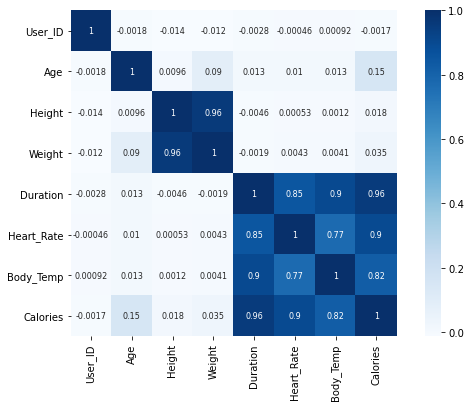

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(ds.corr(), square=True, annot= True, annot_kws={'size':8}, cmap='Blues')

In [13]:
ds.replace({'Gender':{'male':1,'female':0}},inplace=True)

In [14]:
x = ds.drop(['User_ID', 'Heart_Rate','Body_Temp','Calories'], axis=1)
x1 = ds.drop(['User_ID', 'Heart_Rate','Calories'], axis=1)

In [15]:
y = ds['Calories']

In [16]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=30)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y,test_size=.2, random_state=30)

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.fit_transform(x1_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [22]:
y_predicted = model.predict(x_test_scaled)
score = r2_score(y_predicted, y_test)

In [23]:
score

0.9318246367476568

In [24]:
model.fit(x1_train_scaled, y1_train)

LinearRegression()

In [25]:
y1_predicted = model.predict(x1_test_scaled)
score = r2_score(y1_predicted, y1_test)

In [26]:
score

0.940913381765581

In [27]:
from sklearn.pipeline import make_pipeline

In [28]:
pipe = make_pipeline(StandardScaler(),LinearRegression())

In [29]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [30]:
y_test_predicted= pipe.predict(x_test)

In [31]:
score = r2_score(y_test_predicted, y_test)

In [32]:
score

0.9327379828459766

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.cluster import KMeans

In [35]:
ds

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0
